### Country Wise Dataset

In [1]:
from dash import Dash, html, dcc, Input, Output,callback
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import numpy as np

In [2]:
CountryWise=pd.read_csv('country_wise_latest.csv')

### DATA Exploration

In [3]:
CountryWise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
#Renaming Column Country/Region --> Country
CountryWise.rename(columns={'Country/Region':'Country','1 week % increase':'One_Week_Increase_Perc'},inplace=True)

In [5]:
CountryWise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  One_Week_Increase_Perc  187 non-null    float64
 14  WHO Region              187 non-null    ob

In [6]:
CountryWise.describe(include='all')

c:\Users\ihab_\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,One_Week_Increase_Perc,WHO Region
count,187,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000,187
unique,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
mean,NaN,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203,NaN
std,NaN,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838,NaN
min,NaN,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000,NaN
25%,NaN,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000,NaN
50%,NaN,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000,NaN
75%,NaN,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000,NaN


<Axes: >

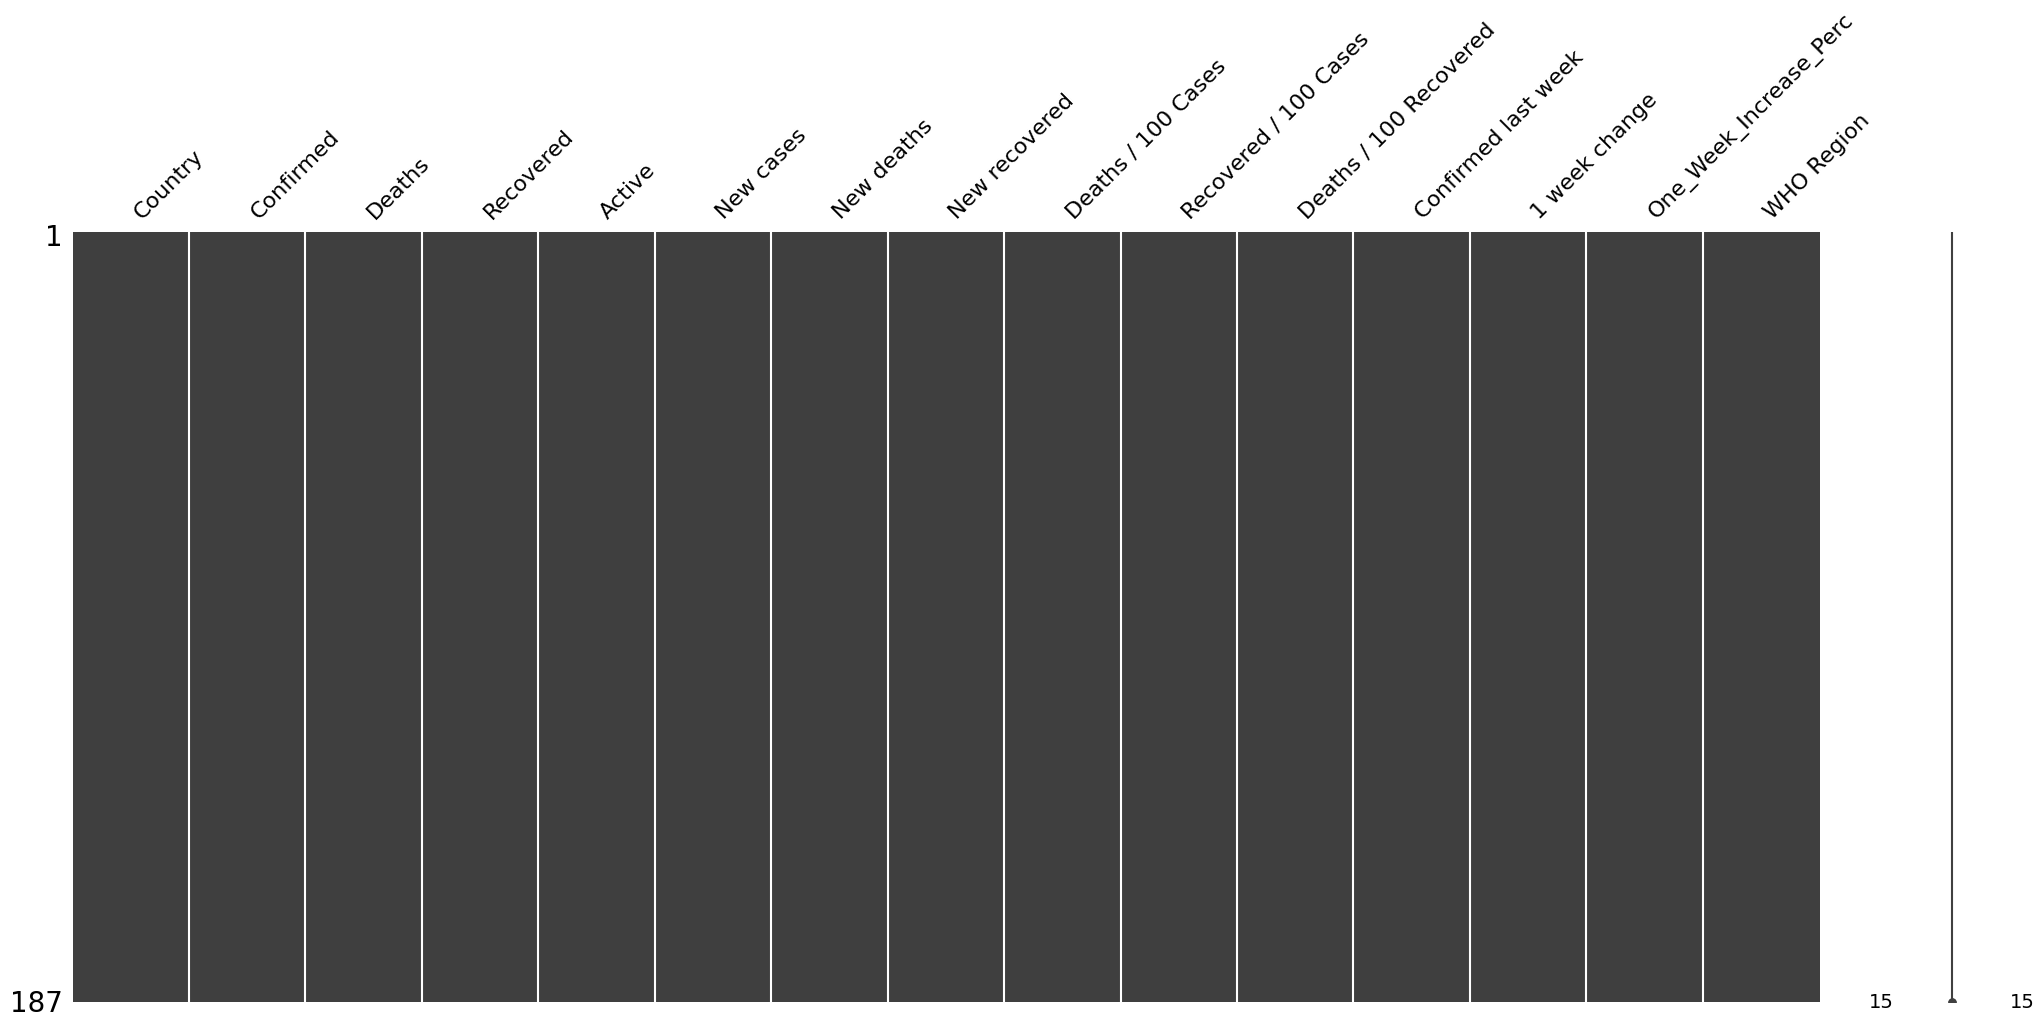

In [7]:
import missingno
missingno.matrix(CountryWise)
#There's no null values

In [8]:
CountryWise.duplicated().sum()
#There's no Duplicates

np.int64(0)

### EDA & FEATURE ENGINEERING

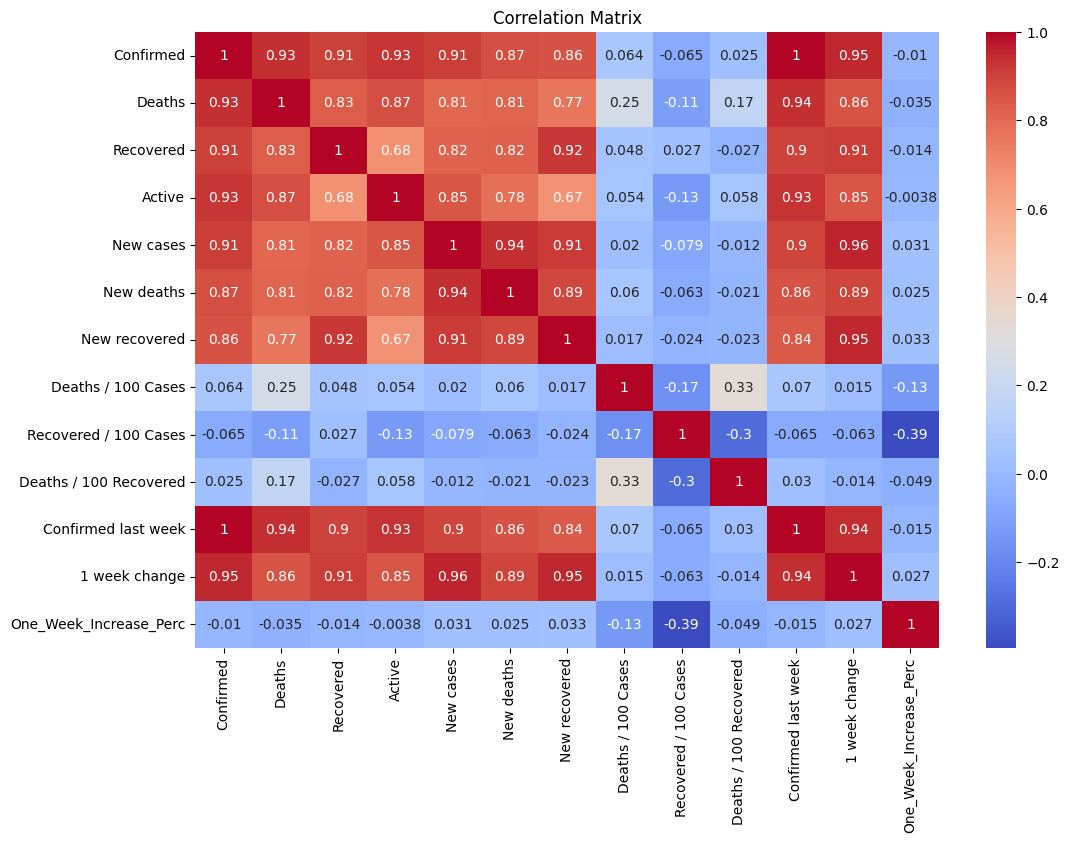

In [9]:
num_cols=CountryWise.select_dtypes(include=[int,float])
plt.figure(figsize=(12,8))
sns.heatmap(num_cols.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\ihab_\AppData\Local\Temp\ipykernel_17568\736759027.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ihab_\AppData\Local\Temp\ipykernel_17568\736759027.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ihab_\AppData\Local\Temp\ipykernel_17568\736759027.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ihab_\AppData\Local\Temp\ipykernel_17568\736759027.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` a

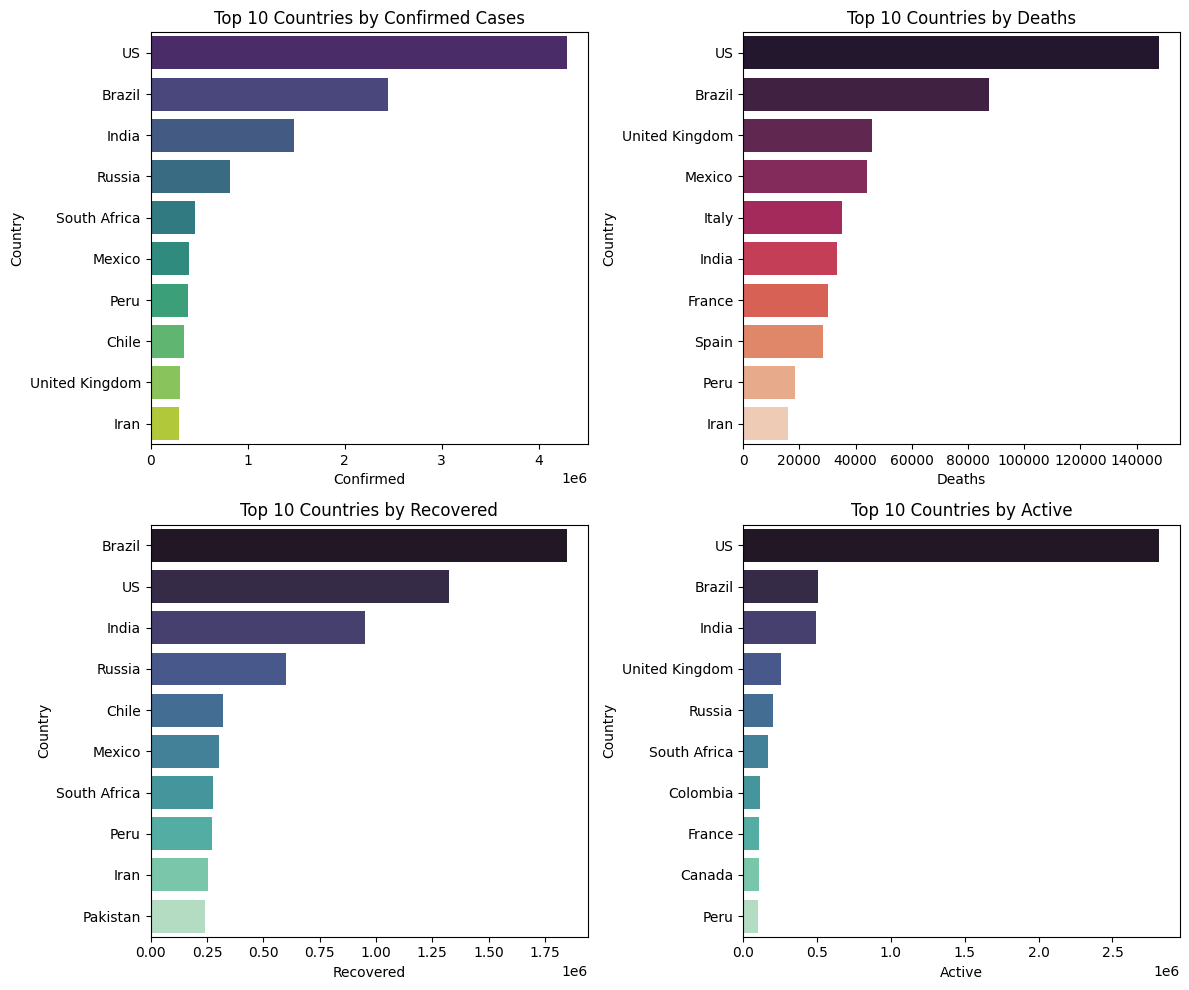

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Plot 1: Bar plot of total confirmed cases
sns.barplot(
    data=CountryWise.nlargest(10, 'Confirmed'),
    x='Confirmed',
    y='Country',
    ax=axes[0, 0],
    palette='viridis'
)
axes[0, 0].set_title("Top 10 Countries by Confirmed Cases")

# Plot 2: Bar plot of total deaths
sns.barplot(
    data=CountryWise.nlargest(10, 'Deaths'),
    x='Deaths',
    y='Country',
    ax=axes[0, 1],
    palette='rocket'
)
axes[0, 1].set_title("Top 10 Countries by Deaths")

sns.barplot(
    data=CountryWise.nlargest(10, 'Recovered'),
    x='Recovered',
    y='Country',
    ax=axes[1,0],
    palette='mako'
)
axes[1,0].set_title("Top 10 Countries by Recovered")

sns.barplot(
    data=CountryWise.nlargest(10, 'Active'),
    x='Active',
    y='Country',
    ax=axes[1,1],
    palette='mako'
)
axes[1,1].set_title("Top 10 Countries by Active")


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [11]:
px.bar(CountryWise,x='WHO Region',y='Confirmed',color='Deaths')

In [12]:
px.bar(CountryWise,x='WHO Region',y='Confirmed',color='Recovered')

C:\Users\ihab_\AppData\Local\Temp\ipykernel_17568\3104596497.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




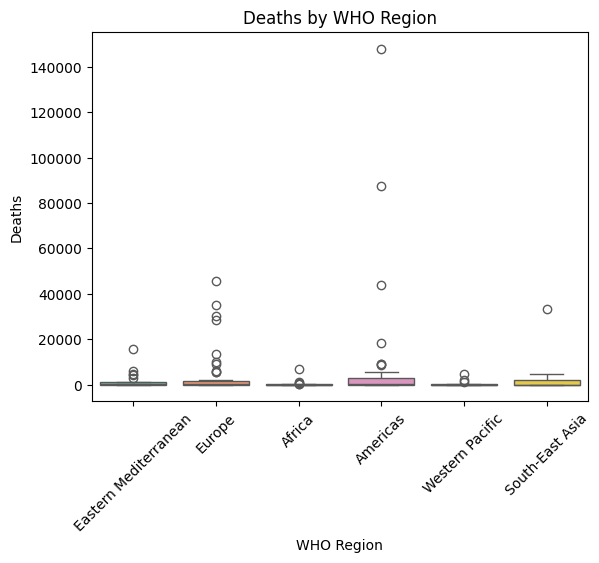

In [13]:
sns.boxplot(data=CountryWise, x='WHO Region', y='Deaths', palette='Set2')
plt.title('Deaths by WHO Region')
plt.xticks(rotation=45)
plt.show()

In [14]:
CountryWise.columns

Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', 'One_Week_Increase_Perc',
       'WHO Region'],
      dtype='object')

In [15]:
px.bar(CountryWise,x='Country',y='Deaths / 100 Cases',title='Top Countries Registered Deaths / 100 Cases')

In [16]:
#Ques: WHich region has the heighest Recovery Rate?
#Average Recovery Rate by WHO REGION
AVR_RR=CountryWise.groupby('WHO Region')[['Recovered / 100 Cases']].mean().reset_index()
print(AVR_RR.sort_values('Recovered / 100 Cases',ascending=False))
px.pie(AVR_RR,names='WHO Region',values='Recovered / 100 Cases',title='Average Recovery Rate by WHO Region')

              WHO Region  Recovered / 100 Cases
5        Western Pacific              76.805000
3                 Europe              68.635000
4        South-East Asia              66.704000
2  Eastern Mediterranean              66.593182
1               Americas              62.291429
0                 Africa              57.014792


In [17]:
#Ques: WHich region has the fatality Rate?
AVR_FR=CountryWise.groupby('WHO Region')[['Deaths / 100 Cases']].mean().reset_index()
print(AVR_FR.sort_values('Deaths / 100 Cases',ascending=False))
px.pie(AVR_FR,names='WHO Region',values='Deaths / 100 Cases',title='Average  Fatality  Rate by WHO Region')

              WHO Region  Deaths / 100 Cases
3                 Europe            4.198393
2  Eastern Mediterranean            3.563182
1               Americas            3.052571
0                 Africa            2.306458
4        South-East Asia            1.296000
5        Western Pacific            1.290000


In [18]:
Week_Change=CountryWise.groupby('WHO Region')[['One_Week_Increase_Perc']].mean().reset_index()
print(Week_Change.sort_values('One_Week_Increase_Perc',ascending=False))
px.line(Week_Change,x='WHO Region',y='One_Week_Increase_Perc',title='Weekly Growth Trends by WHO Region')


              WHO Region  One_Week_Increase_Perc
5        Western Pacific               22.111250
0                 Africa               18.086458
1               Americas               16.331143
2  Eastern Mediterranean               10.482273
4        South-East Asia                8.513000
3                 Europe                7.769643


In [19]:
CountryWise.columns

Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', 'One_Week_Increase_Perc',
       'WHO Region'],
      dtype='object')

In [20]:
#Relationship Between New Cases, New Recoveries, and New Deaths Across Countries
px.scatter(CountryWise,x='New cases',y='New recovered',size='New deaths',title='Relationship Between New Cases, New Recoveries, and New Deaths Across Countries',hover_name='Country')